#1


In [ ]:
import matplotlib.pyplot as plt
from keras.layers.normalization import layer_normalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras import backend as K
from keras.models import Sequential
import tensorflow as tf
import keras
import time


AdaGrad

works on learning rate by the square root of s (cumulative sum of current and past squared gradients).  
$\alpha$ is learning rate  
$\epsilon$ is the fuzz factor (ensure never have to come across divison by zero) 

$$W_{t+1} = W_{t} - \dfrac{\alpha}{\sqrt{S_{t} + \epsilon}} \dfrac{\partial L}{\partial W_{t}}$$

where $S_{t} = S_{t-1} + [\dfrac{\partial L}{\partial W_{t}}]^2 $


RMSProp



Instead of taking cumulative sum of squared gradients, use exponential moving average of gradient

where $S_{t} = \beta S_{t-1} +(1-\beta) [\dfrac{\partial L}{\partial W_{t}}]^2 $


RMSProp + Nestrov

Nadam use nesterov to update the gradient one step ahead by replacing previous $\hat{V_{t}}$  in the below equation to current $\hat{V_{t}}$

$$W_{t+1} = W_{t} - \dfrac{\alpha}{\sqrt{S_{t}} + \epsilon} (\beta_{1} \hat{V_{t-1}}  + \dfrac{1-\beta_{1}^{t}}{1-\beta_{1}} \dfrac {\partial L}{\partial W_{t}})$$

$\hat{V_{t}} =\dfrac{V_{t}}{1-\beta_{1}^{t}}  $

$\hat{S_{t}} =\dfrac{S_{t-1}}{1-\beta_{2}^{t}}  $

where $V_{t} = \beta_{1} V_{t-1} +(1-\beta_{1}) [\dfrac{\partial L}{\partial W_{t}}]^2 $


where $S_{t} = \beta_{2} S_{t-1} +(1-\beta_{2}) [\dfrac{\partial L}{\partial W_{t}}]^2 $


Adadelta

removes the use of the learning rate parameter completely by replaceing it to $D_{t}$ the exponential moving average of squared deltas.

$$W_{t+1} = W_{t} - \dfrac{\sqrt{D_{t-1} + \epsilon}}{\sqrt{S_{t} + \epsilon}} \dfrac{\partial L}{\partial W_{t}}$$

where $D_{t} = \beta D_{t-1} +(1-\beta_{2}) [\Delta W_{t}]^2$

where $S_{t} = \beta S_{t-1} +(1-\beta) [\dfrac{\partial L}{\partial W_{t}}]^2 $

Adam

$$W_{t+1} = W_{t} - \dfrac{\alpha}{\sqrt{S_{t}} + \epsilon} \hat{V_{t-1}}  $$

1) gradient component by using V, the exponential moving average of gradients 
2) the learning rate component by diving the learning rate $\alpha$ by square root of S, the exponential moving average of squared gradients (like RMSprop)

RMSProp is an extension of Adagrad that deals with its gradically diminishing learning rates. It is same to Adadelta except that Adadelta uses the RMS of parameter updates in the numinator update rule. Adam adds bias-correction and momentum to RMSProp. 
However, bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients becoem sparser. 
Adam might be the best overall choice. 

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
model.add(Dense(10, activation='softmax'))

In [ ]:

#Adagrad
tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'
)

t0 = time.time()
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
ada_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose =0)
t1 = time.time()

print(t1-t0)

5836.160767555237


In [ ]:
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

[1.5877764225006104, 0.5321999788284302]
[1.6388462781906128, 0.5085999965667725]


In [ ]:
#RMSprop
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')

t0 = time.time()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
rms_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose =0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

7003.161767482758
[1.9023202657699585, 0.34404000639915466]
[1.9094789028167725, 0.3440999984741211]


In [ ]:
#RMSprop+Nestrov
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Nadam'
)

t0 = time.time()
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])
nadam_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

8421.295073747635
[1.5855237245559692, 0.45726001262664795]
[1.6133171319961548, 0.45399999618530273]


In [ ]:
#Adadelta
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta')

t0 = time.time()
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
delta_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

6410.495619773865
[1.5114153623580933, 0.48754000663757324]
[1.5509651899337769, 0.4758000075817108]


In [ ]:
#Adam
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

t0 = time.time()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
adam_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

6082.868537425995
[1.6830633878707886, 0.42236000299453735]
[1.7055052518844604, 0.4187999963760376]


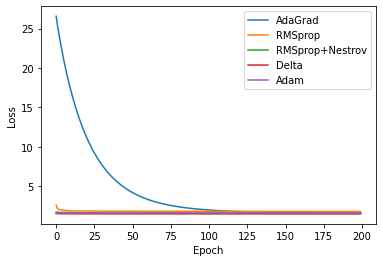

In [ ]:
###Plot
plt.plot(ada_history.history['loss'], label = 'AdaGrad')
plt.plot(rms_history.history['loss'], label = 'RMSprop')
plt.plot(nadam_history.history['loss'], label = 'RMSprop+Nestrov')
plt.plot(delta_history.history['loss'], label = 'Delta')
plt.plot(adam_history.history['loss'], label = 'Adam')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import numpy as np
print(np.mean(ada_history.history['loss']))
print(np.mean(rms_history.history['loss']))
print(np.mean(nadam_history.history['loss']))
print(np.mean(delta_history.history['loss']))
print(np.mean(adam_history.history['loss']))

Delat shows best results (lowest loss value)

1-3

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Adagrad
tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'
)

t0 = time.time()
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
ada_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

6503.118491411209
[1.6494051218032837, 0.4916599988937378]
[1.668703317642212, 0.483599990606308]


In [ ]:
#RMSprop
tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')

t0 = time.time()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
rms_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

7636.008593797684
[2.0761570930480957, 0.29175999760627747]
[2.074373722076416, 0.289900004863739]


In [ ]:
#RMSprop+Nestrov
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Nadam'
)

t0 = time.time()
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])
nadam_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

9214.094183444977
[2.032661199569702, 0.2815200090408325]
[2.0322563648223877, 0.2797999978065491]


In [ ]:
#Adadelta
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name='Adadelta')

t0 = time.time()
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
delta_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

6723.648585796356
[2.0308642387390137, 0.29693999886512756]
[2.0293309688568115, 0.2937000095844269]


In [ ]:
#Adam
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

t0 = time.time()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
adam_history = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test), verbose = 0)
t1 = time.time()

print(t1-t0)
print(model.evaluate(x_train, y_train, batch_size=128, verbose=0))
print(model.evaluate(x_test, y_test, batch_size=128, verbose=0))

6525.818071365356
[2.1182539463043213, 0.22779999673366547]
[2.1171340942382812, 0.2273000031709671]


Text(0, 0.5, 'Loss')

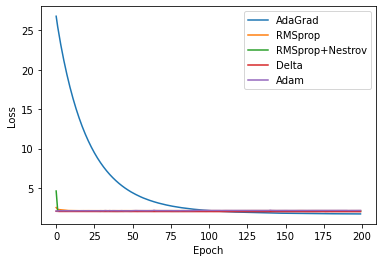

In [ ]:
###Plot
plt.plot(ada_history.history['loss'], label = 'AdaGrad')
plt.plot(rms_history.history['loss'], label = 'RMSprop')
plt.plot(nadam_history.history['loss'], label = 'RMSprop+Nestrov')
plt.plot(delta_history.history['loss'], label = 'Delta')
plt.plot(adam_history.history['loss'], label = 'Adam')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Adadelta without dropout is the lowest loss. Using dropout takes more training time. 


1-4 
Test accuracy without using dropout is better.

2-1


Total dataset size: 70,000,
Training set size : 60,000,
Validation set size : 10,000,
Number of classes : 10,
Number of Images per class : 7,000  


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


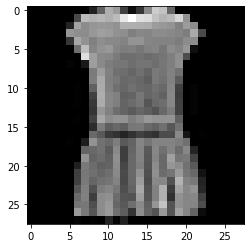

In [ ]:
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

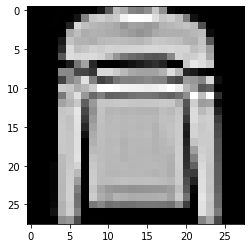

In [ ]:
sample = 5
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

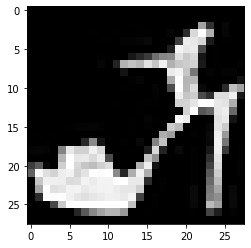

In [ ]:
sample = 9
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

2-2,3,4
- There is only code below, I implemented in another file due to the time. 

2-2

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-learning-rate-finder/keras-learning-rate-finder.zip
!unzip -qq keras-learning-rate-finder.zip
%cd keras-learning-rate-finder

In [ ]:
from pyimagesearch.minigooglenet import MiniGoogLeNet
from pyimagesearch.clr_callback import CyclicLR
from pyimagesearch import config
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import argparse
import cv2
import sys
import os

In [ ]:
class LearningRateFinder:
	def __init__(self, model, stopFactor=4, beta=0.98):
		# store the model, stop factor, and beta value (for computing
		# a smoothed, average loss)
		self.model = model
		self.stopFactor = stopFactor
		self.beta = beta

		# initialize our list of learning rates and losses,
		# respectively
		self.lrs = []
		self.losses = []

		# initialize our learning rate multiplier, average loss, best
		# loss found thus far, current batch number, and weights file
		self.lrMult = 1
		self.avgLoss = 0
		self.bestLoss = 1e9
		self.batchNum = 0
		self.weightsFile = None

	def reset(self):
		# re-initialize all variables from our constructor
		self.lrs = []
		self.losses = []
		self.lrMult = 1
		self.avgLoss = 0
		self.bestLoss = 1e9
		self.batchNum = 0
		self.weightsFile = None

	def is_data_iter(self, data):
		# define the set of class types we will check for
		iterClasses = ["NumpyArrayIterator", "DirectoryIterator",
			 "Iterator", "Sequence"]

		# return whether our data is an iterator
		return data.__class__.__name__ in iterClasses

	def on_batch_end(self, batch, logs):
		# grab the current learning rate and add log it to the list of
		# learning rates that we've tried
		lr = K.get_value(self.model.optimizer.lr)
		self.lrs.append(lr)

		# grab the loss at the end of this batch, increment the total
		# number of batches processed, compute the average average
		# loss, smooth it, and update the losses list with the
		# smoothed value
		l = logs["loss"]
		self.batchNum += 1
		self.avgLoss = (self.beta * self.avgLoss) + ((1 - self.beta) * l)
		smooth = self.avgLoss / (1 - (self.beta ** self.batchNum))
		self.losses.append(smooth)

		# compute the maximum loss stopping factor value
		stopLoss = self.stopFactor * self.bestLoss

		# check to see whether the loss has grown too large
		if self.batchNum > 1 and smooth > stopLoss:
			# stop returning and return from the method
			self.model.stop_training = True
			return

		# check to see if the best loss should be updated
		if self.batchNum == 1 or smooth < self.bestLoss:
			self.bestLoss = smooth

		# increase the learning rate
		lr *= self.lrMult
		K.set_value(self.model.optimizer.lr, lr)

	def find(self, trainData, startLR, endLR, epochs=None,
		stepsPerEpoch=None, batchSize=32, sampleSize=2048,
		verbose=1):
		# reset our class-specific variables
		self.reset()

		# determine if we are using a data generator or not
		useGen = self.is_data_iter(trainData)

		# if we're using a generator and the steps per epoch is not
		# supplied, raise an error
		if useGen and stepsPerEpoch is None:
			msg = "Using generator without supplying stepsPerEpoch"
			raise Exception(msg)

		# if we're not using a generator then our entire dataset must
		# already be in memory
		elif not useGen:
			# grab the number of samples in the training data and
			# then derive the number of steps per epoch
			numSamples = len(trainData[0])
			stepsPerEpoch = np.ceil(numSamples / float(batchSize))

		# if no number of training epochs are supplied, compute the
		# training epochs based on a default sample size
		if epochs is None:
			epochs = int(np.ceil(sampleSize / float(stepsPerEpoch)))

		# compute the total number of batch updates that will take
		# place while we are attempting to find a good starting
		# learning rate
		numBatchUpdates = epochs * stepsPerEpoch

		# derive the learning rate multiplier based on the ending
		# learning rate, starting learning rate, and total number of
		# batch updates
		self.lrMult = (endLR / startLR) ** (1.0 / numBatchUpdates)

		# create a temporary file path for the model weights and
		# then save the weights (so we can reset the weights when we
		# are done)
		self.weightsFile = tempfile.mkstemp()[1]
		self.model.save_weights(self.weightsFile)

		# grab the *original* learning rate (so we can reset it
		# later), and then set the *starting* learning rate
		origLR = K.get_value(self.model.optimizer.lr)
		K.set_value(self.model.optimizer.lr, startLR)

		# construct a callback that will be called at the end of each
		# batch, enabling us to increase our learning rate as training
		# progresses
		callback = LambdaCallback(on_batch_end=lambda batch, logs:
			self.on_batch_end(batch, logs))

		# check to see if we are using a data iterator
		if useGen:
			self.model.fit(
				x=trainData,
				steps_per_epoch=stepsPerEpoch,
				epochs=epochs,
				verbose=verbose,
				callbacks=[callback])

		# otherwise, our entire training data is already in memory
		else:
			# train our model using Keras' fit method
			self.model.fit(
				x=trainData[0], y=trainData[1],
				batch_size=batchSize,
				epochs=epochs,
				callbacks=[callback],
				verbose=verbose)

		# restore the original model weights and learning rate
		self.model.load_weights(self.weightsFile)
		K.set_value(self.model.optimizer.lr, origLR)

	def plot_loss(self, skipBegin=10, skipEnd=1, title=""):
		# grab the learning rate and losses values to plot
		lrs = self.lrs[skipBegin:-skipEnd]
		losses = self.losses[skipBegin:-skipEnd]

		# plot the learning rate vs. loss
		plt.plot(lrs, losses)
		plt.xscale("log")
		plt.xlabel("Learning Rate (Log Scale)")
		plt.ylabel("Loss")

		# if the title is not empty, add it to the plot
		if title != "":
			plt.title(title)

In [ ]:
print("[INFO] loading Fashion MNIST data...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# Fashion MNIST images are 28x28 but the network we will be training
# is expecting 32x32 images
trainX = np.array([cv2.resize(x, (32, 32)) for x in trainX])
testX = np.array([cv2.resize(x, (32, 32)) for x in testX])

# scale the pixel intensities to the range [0, 1]
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# reshape the data matrices to include a channel dimension (required
# for training)
trainX = trainX.reshape((trainX.shape[0], 32, 32, 1))
testX = testX.reshape((testX.shape[0], 32, 32, 1))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# construct the image generator for data augmentation
aug = ImageDataGenerator(width_shift_range=0.1,
	height_shift_range=0.1, horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=config.MIN_LR, momentum=0.9)
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
CLASSES = ["top", "trouser", "pullover", "dress", "coat",
        "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
# otherwise, we have already defined a learning rate space to train
# over, so compute the step size and initialize the cyclic learning
# rate method
BATCH_SIZE = 64
STEP_SIZE = 8

stepSize = STEP_SIZE * (trainX.shape[0] // config.BATCH_SIZE)
clr = CyclicLR(
	mode='triangular',
	base_lr=1e-9,
	max_lr=10,
	step_size=stepSize)

# train the network
print("[INFO] training network...")
H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
	epochs=5,
	callbacks=[clr],
	verbose=1)

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=CLASSES))

In [ ]:
lrf = LearningRateFinder(model)
lrf.find(
		aug.flow(trainX, trainY, batch_size=config.BATCH_SIZE),
		1e-10, 1e+1,
		stepsPerEpoch=np.ceil((trainX.shape[0] / float(config.BATCH_SIZE))),
		epochs=5,
		batchSize=config.BATCH_SIZE)
 
	# plot the loss for the various learning rates and save the
	# resulting plot to disk
lrf.plot_loss()

2-3

In [ ]:
# otherwise, we have already defined a learning rate space to train
# over, so compute the step size and initialize the cyclic learning
# rate method
LR_MIN = 1e-3
LR_MAX = 1e-1



stepSize = STEP_SIZE * (trainX.shape[0] // config.BATCH_SIZE)
clr = CyclicLR(
	mode='triangular',
	base_lr=1e-9,
	max_lr=10,
	step_size=stepSize)

# train the network
print("[INFO] training network...")
H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
	epochs=5,
	callbacks=[clr],
	verbose=1)

# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=CLASSES))

In [ ]:
N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# plot the learning rate history
N = np.arange(0, len(clr.history["lr"]))
plt.figure()
plt.plot(N, clr.history["lr"])
plt.title("Cyclical Learning Rate (CLR)")
plt.xlabel("Training Iterations")
plt.ylabel("Learning Rate")

2-4

In [ ]:
# otherwise, we have already defined a learning rate space to train
# over, so compute the step size and initialize the cyclic learning
# rate method
LR_MIN = 1e-3
LR_MAX = 1e-3

BATCH_LIST = [64, 256, 1024, 2048, 4096, 8192]
loss_res = []

for i in BATCH_LIST: 
  stepSize = STEP_SIZE * (trainX.shape[0] // config.BATCH_SIZE)
  clr = CyclicLR(
    mode='triangular',
    base_lr=LR_MIN,
    max_lr=LR_MAX,
    step_size=stepSize)
  print("[INFO] training network...")
  H = model.fit(
    x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
    epochs=5,
    callbacks=[clr],
    verbose=1)

  # evaluate the network and show a classification report
  print("[INFO] evaluating network...")
  predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
  print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))
  loss_res.append(H.history['loss'][4])

In [ ]:
plt.plot(BATCH_LIST, loss_res)
plt.xlabe('Batch Size')
plt.ylabel('Loss value')
plt.show()

As batch size increase, loss also decrease. However after some point point, it doesn't decrease. 

2-5   
(I will report bmin and bmax after the implmentation finish it takes so much time)   
I think like when we find local minima, set the initial batch size (maybe small) and increase it automatically. If there is no progress in performance after increase, it stops and set previous batch size as final. 

2-6 
Exponential increase in training time. 


2-7 
Cyclic learning rate policy 

#3-1

Number of parameters of the conv layer =  (size of kernels used in the conv layer)^2* Number of channels of the input image* Number of Kernels+Number of biases of the conv layer 

The number of channels = C   
The Kernel size = K  
The number of kernels = N  
The number of bias = B

The size of output image is (size of input image-size of kernels used in conv layer + padding)/stride of the conv operation +1

The size of input image = I 
The size of kernels used in the conv layer = K
Padding = P
Stride of the conv operation = S

CONV1: (C = 3, K = 11, N = 96, B = 96)  
Num of parameters : 11^2 * 3 * 96 + 96 = 34944  
Num of Output size : (227-11+2*2)/4+1 = 55  


POOL1   
0 parameters   
Num of Output size : (55-3)/2+1 = 27  

CONV2   
Num of parameters :5^2* 96 * 256+256 = 614656   
Num of Output : (27-5+2*2)/1+1 = 27

POOL2   
0 parameters   
Num of Output size : (27-3)/2+1 = 13  

CONV3   
Num of parameters :3^2 * 256 * 384+384 = 885120   
Num of Output : (13-3+2*1)/1+1 = 13

CONV4   
Num of parameters :3^2 * 384 * 384+384 = 1327488   
Num of Output : (13-3+2*1)/1+1 = 13

CONV5   
Num of parameters :3^2 * 384 * 256+256 = 884992   
Num of Output : (13-3+2*1)/1+1 = 13

POOL3   
0 parameters   
Num of Output size : (13-3)/2+1 = 6 

FC-1  
Number of parameters: 1^2 * 9216 * 4096 + 4096 = 37752832

FC-2  
Number of parameters: 1^2 * 4096 * 4096 + 4096 = 16781312

FC-2  
Number of parameters: 1^2 * 4096 * 1000 + 1000 = 4097000

Total = 62378344

##3-2

Memory (only empty space) 
CONV3-128 = 112 * 112 * 128 = 1605632   
CONV3-128 = 112 * 112 * 128 = 1605632    
CONV3-256 = 56 * 56 * 256 = 802816  
CONV3-256 = 56 * 56 * 256 = 802816    
CONV3-256 = 56 * 56 * 256 = 802816     
POOL2 = 28 * 28 * 256 = 200704  
CONV3-512 = 28 * 28 * 512 = 401408    
CONV3-512 = 28 * 28 * 512 =  401408       
POOL2 = 14 * 14 * 512 = 100352     
CONV3-512 = 14 * 14 * 512 = 100353  
CONV3-512 = 14 * 14 * 512 = 100353 
CONV3-512 = 14 * 14 * 512 =  100353   
CONV3-512 = 14 * 14 * 512 =  100353  
CONV3-512 = 14 * 14 * 512 = 100353    
POOL2 = 7 * 7 * 512 25088  
TOTAL = 24M * 4 byte = 93MB


Compute (only empty part)   
CONV3-128 = (3 * 3 * 64)*128 = 73728  
CONV3-128 = (3 * 3 * 128)*128 = 147456  
CONV3-256 = (3 * 3 * 128)*256 = 294912  
CONV3-256 = (3 * 3 * 256)*256 = 589824   
CONV3-256 = (3 * 3 * 256)*256 = 589824   
CONV3-512 = (3 * 3 * 512)*512 = 2359296  
CONV3-512 = (3 * 3 * 512)*512 = 2359296  
CONV3-512 = (3 * 3 * 512)*512 = 2359296  
CONV3-512 = (3 * 3 * 512)*512 = 2359296  
CONV3-512 = (3 * 3 * 512)*512 = 2359296  
CONV3-512 = (3 * 3 * 512)*512 = 2359296   
CONV3-512 = (3 * 3 * 512)*512 = 2359296
FC = 7 * 7 * 512 * 4096 = 102760448  
FC = 4096 * 1000 = 4096000  
Total = 138M parameters


#3-3


A stacl of N conv layer of filter size FxF, = L-F+1, where L is shape and K is kernel.  
N times = L-N(F+1)  

One conv layer with filter size = (NF-N+1) * (NF-N+1)
L-(NF-N+1)+1 = L-N(F+1)

4-(a) It allows for us to use multiple types of filter size instead of being restricted to a single filter size, in a single image block, which we then concatenate and pass onto the next layer. 
 Instead of stacking layers deeply, they operate multiple sizes' filters on a same level. 

4-(b)  
Naive : 32 * 32 * (128+192+96+256) = 32 * 32 * 672  
Dimensionality reduction :  32 * 32 * (128+192+96+64) = 32 * 32 *480 

4-(c)
 Naive : 
 Conv1: 32 * 32 * 1 * 256 * 128 = 33554432  
 Conv3: 32 * 32 * 9 * 256 * 128 = 301989888  
 Conv5 : 32 * 32 * 25 * 256 * 128 = 838860800  
Total = 1174405120

Dimensionality reduction : 
 CONV1: (32 * 32 * 256 * 128) + (32 * 32 * 256 * 128) +(32 * 32 * 256 * 64) = 92274668   
 CON3 = 32 * 32 * 9 * 128 * 192 = 226492416  
 CONV5 = 32 * 32 * 25 * 32 * 96 = 78643200    
Total = 397410304

4-(d)  
Since naive has more parameter than dimensionality reduction, it takes more time.
  

##4
- There is only code below, I implemented in another file. 

4-(a) 
Cutout regularization is cutting out some regions of images, and augument the dataset. It's kind of dropout of input space. For dropout,it doesn't work well with conv layers. Since close pixels usually share same information.  

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


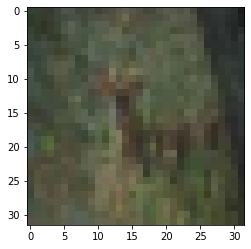

In [ ]:
import matplotlib.pyplot as plt
test_image1 = x_train[10]
test_image2 = x_train[25]

plt.imshow(test_image1)

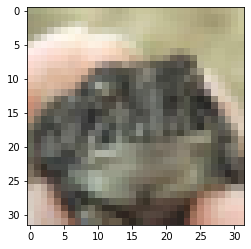

In [ ]:
plt.imshow(test_image2)

In [ ]:
import torch
import numpy as np

def apply_mask(image, size=12, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

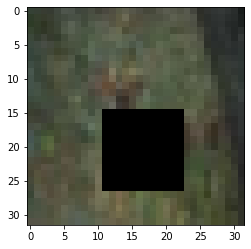

In [ ]:
plt.imshow(apply_mask(test_image1))

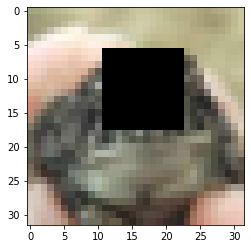

In [ ]:
plt.imshow(apply_mask(test_image2))

#4-2

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import math

# training parameters
batch_size = 64 # orig paper trained all networks with batch_size=128
epochs = 10
data_augmentation = True
num_classes = 10

# subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------
n = 3

# model version
# orig paper: version = 1 (ResNet v1), 
# improved ResNet: version = 2 (ResNet v2)
version = 1

# computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]
    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or 
    also known as bottleneck layer.
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, 
    the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, 
    while the number of filter maps is
    doubled. Within each stage, the layers have 
    the same number filters and the same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 110 in [b])')
    # start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU
    # on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                # first layer and first stage
                if res_block == 0:  
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                # first layer but not first stage
                if res_block == 0:
                    # downsample
                    strides = 2 

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection
                # to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])

        num_filters_in = num_filters_out

    # add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['acc'])
model.summary()

# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file="%s.png" % model_type, show_shapes=True)
print(model_type)

# prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # this will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False)

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    steps_per_epoch =  math.ceil(len(x_train) / batch_size)
    # fit the model on the batches generated by datagen.flow().
    history = model.fit(x=datagen.flow(x_train, y_train, batch_size=batch_size),
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch,
              callbacks=callbacks)


# score trained model
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Epochs vs Test Loss')
plt.grid()

In [ ]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

4-3

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Data normalization
m, std = np.mean(x_train), np.std(x_train)
x_train = (x_train - m)/std
x_test = (x_test - m)/std
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [ ]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 85:
        lr *= 0.5e-3
    elif epoch > 75:
        lr *= 1e-3
    elif epoch > 65:
        lr *= 1e-2
    elif epoch > 50:
        lr *= 1e-1
    print('Learning rate:', lr)
    return lr
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
def batch_generator(x, y, epochs, m, batch_size, augment=None):
    for _ in range(epochs):
        n = x.shape[0]
        reorder = np.random.permutation(n)
        cursor = 0
        while cursor + batch_size < x.shape[0]:
            x_batch = x[reorder[cursor:cursor+batch_size]]
            y_batch = y[reorder[cursor:cursor+batch_size]]
            if augment != None:
                yield np.array([augment(xx) for xx in x_batch for rep in range(m)]), np.array([yy for yy in y_batch for rep in range(m)])
            else:
                yield x_batch, y_batch
            cursor += batch_size

In [ ]:
import torch
import numpy as np

def apply_mask(image, size=12, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.layers import Flatten, add

val_acc_cutout = []
epochs = 100
durations = []
for i in [2,4,8,16,32]:
    model = resnet_v1(
        input_shape=x_train.shape[1:],
        depth=44
    )      
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=['accuracy']
    )    
    duration = time.time()
    hist = model.fit(
        batch_generator(
            x_train,
            y_train,
            m=i,
            batch_size=64,
            epochs=100, 
            augment=apply_mask
        ),
        epochs=1, 
        validation_data=(x_test,y_test),
        steps_per_epoch=np.floor(x_train.shape[0]/64.0),
        verbose=0,
        callbacks=[lr_scheduler]
    )
    durations.append(time.time()-duration)
    val_acc_cutout.append(hist.history['val_accuracy'])

In [ ]:
def opp(l):
    return [1-el for el in l]
cutout2_data, cutout4_data, cutout8_data, cutout16_data,    
  cutout32_data = val_acc_cutout
plt.plot(range(1,101),opp(simple_val_acc),"y-")
plt.plot(range(1,101),opp(cutout2_data),"b-")
plt.plot(range(1,101),opp(cutout4_data),"c-")
plt.plot(range(1,101),opp(cutout8_data),"g-")
plt.plot(range(1,101),opp(cutout16_data),"r-")
plt.plot(range(1,101),opp(cutout32_data),"m-")
plt.legend(["M=0","M=2","M=4","M=8","M=16","M=32"])
plt.plot(np.linspace(0,100,10000),[0.06]*10000,"k-")
plt.title("Validation error for M instances with cutout generated from each input")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.savefig("acc_cutout.png")
plt.show()